# Predicting of Bank Term Deposit Using Machine Learning

## 1. Introduction

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## 2. Data Preparation

### Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report


### Reading Data

In [2]:
bank = pd.read_csv('data_input/bank-full.csv', sep=';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Atribute Information**

**Bank client data:**
- Age (numeric)
-Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)
- Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)
- Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)
- Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
- Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
- Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)

**Related with the last contact of the current campaign:**
- Contact: contact communication type (categorical: ‘cellular’,‘telephone’)
- Month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
- Day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)
- Duration: last contact duration, in seconds (numeric). - - ---- Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

## 3. Exploratory Data Analysis

### 3.1 Checking the type of each variable

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3.2 Checking for missing value 

In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Result:** Data has no missing value

### 3.3 Number of clients who have subscribed or not subscribed to Term Deposit

<AxesSubplot:xlabel='y'>

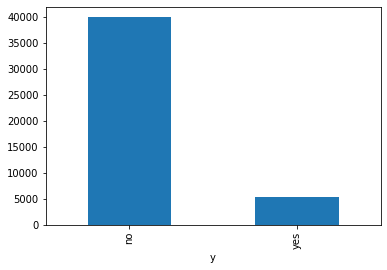

In [5]:
bank[['y']].groupby('y').value_counts().plot(kind = 'bar')

As we can see that the proportion of unsubscribed data is much higher than that of subscribed, this means that the number of subscribers who are called decided not to subscribe 

### 3.4 Checking for the Correlation between variables

In [6]:
bank[['y']].groupby('y').value_counts()

y
no     39922
yes     5289
dtype: int64

<AxesSubplot:>

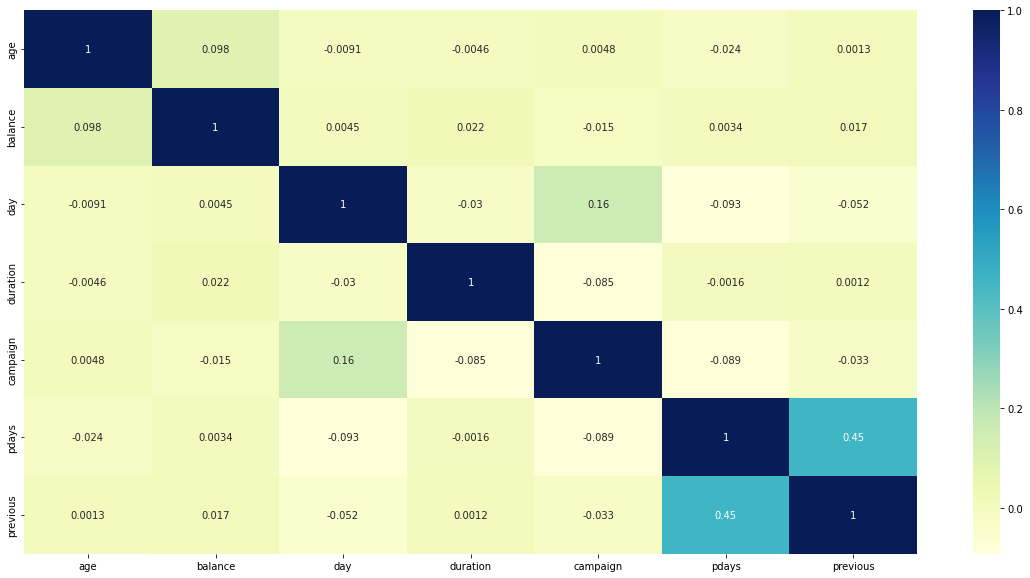

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(),annot=True, cmap='YlGnBu')

There are no sufficiently correlated variables

### 3.5 Remove contact variable

In [8]:
bank[['contact']].groupby('contact').value_counts()

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

Because the contact column contains many unknown values, this column will be discarded

In [9]:
bank.drop(columns='contact', inplace=True)

## 4. Data Preprocessing

### 4.1 Encoding Labels

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [11]:
le = LabelEncoder()

bank.job = le.fit_transform(bank.job)
bank.marital = le.fit_transform(bank.marital)
bank.education = le.fit_transform(bank.education)
bank.default = le.fit_transform(bank.default)
bank.month = le.fit_transform(bank.month)
bank.housing = le.fit_transform(bank.housing)
bank.loan = le.fit_transform(bank.loan)
bank.poutcome = le.fit_transform(bank.poutcome)

In [12]:
bank.y = bank.y.map({'yes':1, 'no':0})

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,0



### 4.2 Cross Validation or Splitting Dataset

In [14]:
X = bank.drop('y', axis=1)
Y = bank.y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [15]:
x_train.shape, y_train.shape

((36168, 15), (36168,))

### 4.3 Checking the balance of data proportion

In [16]:
y_train.value_counts()

0    31929
1     4239
Name: y, dtype: int64

In [17]:
y_train.value_counts()/(31904+4264)

0    0.882797
1    0.117203
Name: y, dtype: float64

The proportion of the data is 8:1, unbalanced data proportion.

### 4.4 Balancing Data

In [18]:
bank_train = x_train
bank_train['y'] = y_train

bank_yes = bank_train[bank_train.y == 1]
bank_no = bank_train[bank_train.y == 0]

no_downsample = resample(bank_no,
                          replace=True,
                          n_samples=len(bank_yes),
                          random_state=0)

bank_ds = pd.concat([no_downsample, bank_yes])


x_train, y_train = bank_ds.drop('y', axis =1), bank_ds.y

In [19]:
x_train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
6032,23,7,1,1,0,0,1,1,26,8,90,5,-1,0,3
35825,37,9,1,3,0,88,1,1,8,8,66,1,308,2,0
44787,30,4,2,2,0,13774,0,0,14,11,380,1,-1,0,3
22274,39,4,1,2,0,1363,0,0,21,1,294,3,-1,0,3
14375,50,4,1,2,0,6739,1,0,14,5,68,3,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11631,25,1,2,1,0,-191,1,0,19,6,958,7,-1,0,3
34105,35,4,2,2,0,1162,0,0,30,0,175,1,-1,0,3
34246,32,8,2,2,0,1138,0,0,4,8,214,3,83,3,2
44510,61,5,1,1,0,1853,0,0,10,1,520,1,181,2,2


In [20]:
y_train.value_counts()

0    4239
1    4239
Name: y, dtype: int64

## Training the Model

### 1. Logistic Regression

#### 1.1 Model fitting

In [21]:
model_lg =LogisticRegression(random_state=0, solver='lbfgs',multi_class='auto',max_iter=1000)

In [22]:
model_lg.fit(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

#### 1.4 Model Evaluation

In [23]:
y_pred = model_lg.predict(x_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7993
           1       0.32      0.77      0.45      1050

    accuracy                           0.78      9043
   macro avg       0.64      0.78      0.66      9043
weighted avg       0.89      0.78      0.82      9043



### 2. K-Nearest Neighbors

#### 1.1 Model fitting

Looking for optimum k-value

In [25]:
n = np.sqrt(len(y_train))
n

92.07605551933683

In [26]:
model_knn = KNeighborsClassifier(n_neighbors=91)

In [27]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=91)

#### 1.4 Model Evaluation

In [28]:
y_pred = model_knn.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7993
           1       0.28      0.73      0.41      1050

    accuracy                           0.75      9043
   macro avg       0.62      0.74      0.63      9043
weighted avg       0.88      0.75      0.79      9043



### 3. Support Vector Machine

#### 1.1 Model fitting

In [30]:
model_svm = svm.SVC(kernel='linear')

In [31]:
model_svm.fit(x_train, y_train)

SVC(kernel='linear')

#### 1.4 Model Evaluation

In [32]:
y_pred = model_svm.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83      7993
           1       0.29      0.84      0.43      1050

    accuracy                           0.74      9043
   macro avg       0.63      0.78      0.63      9043
weighted avg       0.89      0.74      0.78      9043



### 4. Decision Tree

#### 1.1 Model fitting

In [34]:
model_tree = DecisionTreeClassifier()

In [35]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

#### 1.4 Model Evaluation

In [36]:
y_pred = model_tree.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      7993
           1       0.31      0.77      0.44      1050

    accuracy                           0.77      9043
   macro avg       0.63      0.77      0.65      9043
weighted avg       0.89      0.77      0.81      9043



### 5. Random Forest

#### 1.1 Model fitting

In [38]:
model_rf = RandomForestClassifier()

In [39]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

#### 1.4 Model Evaluation

In [40]:
y_pred = model_rf.predict(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7993
           1       0.37      0.88      0.53      1050

    accuracy                           0.82      9043
   macro avg       0.68      0.84      0.71      9043
weighted avg       0.91      0.82      0.84      9043



### 6. Naive Bayes

#### 1.1 Model fitting

In [42]:
model_nb = GaussianNB()

In [43]:
model_nb.fit(x_train, y_train)

GaussianNB()

#### 1.4 Model Evaluation

In [44]:
y_pred = model_nb.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      7993
           1       0.29      0.72      0.42      1050

    accuracy                           0.77      9043
   macro avg       0.62      0.75      0.64      9043
weighted avg       0.88      0.77      0.80      9043



## Conclusion

For the best model to be used is the random forest model, because it has the best performance in all parameters of the confusion matrix